In [1]:
import pandas as pd
import numpy as np

In [132]:
data= pd.read_csv(r"C:\Users\diyas\Documents\Recommendation_system\UpdatedMaster19Feb_NLP.csv") 

In [133]:
data.columns

Index(['Unnamed: 0', 'USN', '10thPercentage', '12thPercentage', 'Branch',
       'CGPA', 'CourseName', 'CourseGrade', 'CompanyName_New', 'CTC',
       'TierLevel', 'CoCurricularActivities', 'EmploymentType',
       'EventsParticipated', 'GeneralSkills', 'Languages', 'MinorAttended',
       'NoofInternships', 'InternshipProjectDomain', 'InternshipCompany',
       'NoofProjects', 'ProjectDetailDomain', 'ProgLanguages', 'Publication',
       'ResearchDomain', 'ScholarshipsKey', 'SoftwareTools',
       'VolunteeringWork', 'WorkshopsOrg', 'WorkshopsDomain', 'AwardsNLPkey',
       'ExternalCertificatesKey', 'ExternalCertificatesDomain'],
      dtype='object')

In [134]:
data.TierLevel.unique()

array([ 1.,  2., nan,  3.])

In [135]:
#number of missing ctc and tier values
print(data['TierLevel'].isnull().sum())
print(data['CTC'].isnull().sum())

49
41


In [136]:
#Main function
def PreprocessCTC(data):
    #convert CTC to standard format
    df=data
    for idx, row in df.iterrows():
        if row.CTC > 100:
            data.set_value(idx, 'CTC', row.CTC/100000)
    return(data)

def TierProcess(data):
    df_ctc=PreprocessCTC(data)
    df_ctc['CTC'] = pd.to_numeric(df_ctc['CTC'],errors='coerce')
    #map CTC to Tier level based on 2021 Tier mapping
    for idx, row in data.iterrows():
        if np.isnan(row.TierLevel):
            #print(row.CTC) - mostly all 0 are printed here
            if row.CTC > 0 and row.CTC <= 5:
                df_ctc.set_value(idx, 'TierLevel', 3)
            if row.CTC > 5 and row.CTC <= 10:
                df_ctc.set_value(idx, 'TierLevel', 2)
            if row.CTC > 10:
                df_ctc.set_value(idx, 'TierLevel', 1)
    return(df_ctc)
    
df_final=TierProcess(data)    

In [137]:
print(df_final['TierLevel'].isnull().sum())
print(df_final['CTC'].isnull().sum())

49
41


In [138]:
df=df_final
df1 = df[df['TierLevel'] == 1]
df2 = df[df['TierLevel'] == 2]
df3 = df[df['TierLevel'] == 3]
print("Tier 1 count",len(df1))
print("Tier 2 count",len(df2))
print("Tier 3 count",len(df3))

Tier 1 count 284
Tier 2 count 89
Tier 3 count 19


Tier 1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C9060E438>]],
      dtype=object)

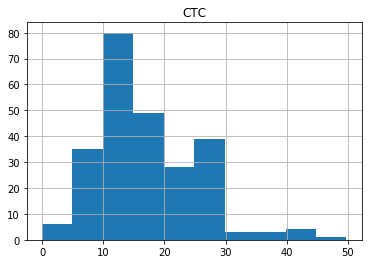

In [139]:
print("Tier 1")
df1.hist(column=["CTC"])

Tier 2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C91ECF0F0>]],
      dtype=object)

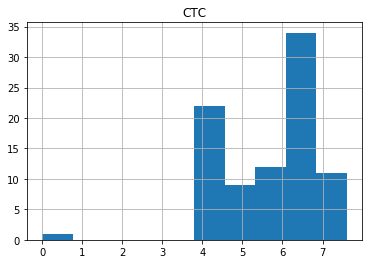

In [140]:
print("Tier 2")
df2.hist(column=["CTC"])

Tier 3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C91FED710>]],
      dtype=object)

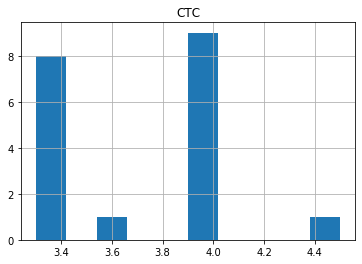

In [141]:
print("Tier 3")
df3.hist(column=["CTC"])